# The U.S. Diabetes Dataset -- EDA and Machine Learning

**Name:** Amirh Kiani

**Date:** June 19, 2024

**Contact:** amirkianitech@gmail.com

### Table of Contents

- [1. Introduction](#section-1)
- [2. Imports and Sanity Checks](#section-2)
- [3. Cleaning Data - the `diab` Dataset](#section-3)
    - [3.1. Finding Null Values](#section-3.1)
    - [3.2. Data Imputation](#section-3.2)
- [4. Feature Engineering](#section-4)
- [5. Cleaning Data - the `mapp` Dataset](#section-5)
- [6. EDA](#section-6)
    - [6.1. Demographics of the Population](#section-6.1)
    - [6.2. Breakdown of Admission Types](#section-6.2)
    - [6.3. Identifying Sub-Groups to Explore and Assessing Readmission Risk](#section-6.3)
    - [6.4. Statistical Analysis of the Results](#section-6.4)
    - [6.5. More EDA](#section-6.5)
    - [6.6. Summary of Demographic and Sub-Group Analysis](#section-6.6)
- [7. Machine Learning](#section-7)
- [7.1. One-Hot Encode Categorical Variables](#section-7.1)
- [7.2. Creating the Model](#section-7.2)



# 1. Introduction <a class ='author' id='section-1'></a>
The diabetes data is from U.S. hospitals during the period 1999-2008. It includes approximately 100,000 records with approximately 50 variables.

In this notebook I explore the dataset and determine if there are any sub-groups that are at higher risk for hospital readmission. 

Here are different stages of the project and the tasks required to perform:

**Data Cleaning**

- Load and clean the data. Briefly describe the cleaning steps that were needed. Are there any major problems with this data that should be fixed for future analysis? If so, briefly give your recommendations.


**EDA and Statistics**

- Conduct exploratory data analysis and summarize the findings. Among other things, describe and visualize the demographics of the population, provide a breakdown of the admission types (with descriptions), and identify the overall % of patients who were readmitted. Describe any data transformations needed to obtain this overview.

- Identify a few sub-groups to explore and note why you choose these groups. Identify if any of the selected groups are at higher risk for readmission.

- Summarize the main findings in a paragraph or two.

**Machine Learning**

- Create a logistic-regression model, and evaluate its performance. Include appropriate metrics and visual outputs.

# 2. Imports and Sanity Checks <a class ='author' id='section-2'></a>

In [247]:
# let's import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# allowing to  scorll over all columns
pd.set_option('display.max_columns', None)

In [249]:
diab = pd.read_csv('diabetic_data.csv')
mapp = pd.read_csv('IDS_mapping.csv')

In [250]:
diab.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [251]:
diab.A1Cresult.value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [252]:
mapp # will clean this data later

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [253]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [254]:
diab.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [255]:
mapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [256]:
mapp.describe()

,admission_type_id,description
count,65,62
unique,32,58
top,1,Unknown/Invalid
freq,3,2


# 3. Cleaning Data - the `diab` Dataset <a class ='author' id='section-3'></a>

**Tasks**

- Load and clean the data. Briefly describe the cleaning steps that were needed. Are there any major problems with this data that should be fixed for future analysis? If so, briefly give your recommendations.

- Normalize or “tidy” the data as needed to support exploratory data analysis and machine learning. Briefly explain the steps that you took for this purpose.


## 3.1. Finding Null Values <a class ='author' id='section-3.1'></a>
We take several steps to impute the remaining missing data.

In [257]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [258]:
diab.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [259]:
diab.duplicated().sum()

0

At the first glance there is no null values, but closer inspection shows that unknown data pints are assigned '?'. We will turn them into null values.

In [260]:
diab.loc[0]['weight']

'?'

In [261]:
diab.replace('?', np.nan, inplace=True)

In [262]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [263]:
diab.isna().sum()/len(diab)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

We see that a few columns have null data of varying portions: `weight`: 97%, `medical_specialty`: 49%, `payer_code`: 40% and a few other collumns with up to 2% of missing data each.

In [264]:
# Weight attribute was considered to be too sparse and it will not be included in further analysis
diab.drop(['weight'],axis=1,inplace=True)

`race`, `diag_1`, `diag_2`, `diag_3` are too negligible in their percebtages, so we drop the rows with nulls

In [265]:
# Drop rows where any of the specified columns ('race', 'diag_1', 'diag_2', 'diag_3') have NaN values
diab.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], axis=0, inplace=True)

In [266]:
diab.isna().sum()/len(diab)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.696899
medical_specialty           49.277432
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

## 3.2. Data Imputation <a class ='author' id='section-3.1'></a>
We take several steps to impute the remaining missing data.

### 3.2.1. Using `patient_nbr`
We use this columns, which is a unique patient identifier, to impute some of the missing data. For example, if a patient has their race specified at a row but not another, we can use the data from the former to impute the latter. Same applies to the other variables.

In [267]:
diab.patient_nbr.nunique()

68630

In [268]:
len(diab)

98053

As we can see, about 30K patients patient data are about previously admitted patients. We use this to impute some of our missing data

In [269]:
def fill_missing_by_patient(df, column):
    # Create a dictionary to map patient_nbr to the column values
    value_dict = df.dropna(subset=[column]).drop_duplicates('patient_nbr').set_index('patient_nbr')[column].to_dict()
    
    # Define a function to fill missing values based on patient_nbr
    def fill_value(row):
        if pd.isna(row[column]):
            return value_dict.get(row['patient_nbr'], row[column])
        else:
            return row[column]
    
    # Apply the function to the DataFrame
    df[column] = df.apply(fill_value, axis=1)

    return df

In [270]:
# Identify columns with missing values
columns_with_na = diab.columns[diab.isna().any()].tolist()
columns_with_na

['payer_code', 'medical_specialty']

In [271]:
# Apply the function to each column with missing values
for col in columns_with_na:
    diab = fill_missing_by_patient(diab, col)

In [272]:
diab.isna().sum()/len(diab)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  38.069207
medical_specialty           44.174069
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

We can see this helped slightly, but not much. We will deal with the remaining missing data in a different way.

### 3.2.2. `medical_specialty`

In [273]:
diab['medical_specialty'].isna().sum()/len(diab)*100

44.1740691258809

Even after the imputation above, we see that still 44% of the data for this variable is missing. This is a siginifcant portion of the data, so dropping the values would mean loss of a lot data.

On the other hand, we can assign a new category of "missing" to the null values and use it for our analyses and ML (as in the cited paper).

In [274]:
# Fill missing values in 'medical_specialty' with 'missing'
diab['medical_specialty'].fillna('missing', inplace=True)

In [275]:
diab.isna().sum()/len(diab)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  38.069207
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

### 3.2.3. `payer_code`

`payer_code` has a high percentage of missing values as well, but it also doesn't seem relevant to the outcome, which is to create a logisic regression model to predict if the patient was readmitted within 30 days of discharge.

We remove this column since it has a high percentage of missing values and it does not seem relevant or useful to the final outcome.

In [276]:
diab.drop(['payer_code'],axis=1,inplace=True)

In [277]:
diab.isna().sum()/len(diab)*100

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglita

Alright! Now we have no missing values left.

## 4. Feature Engineering <a class ='author' id='section-4'></a>

Now let's perform some feature engineering on our data.

### 4.1. Create Binary Outcome Variable for Readmission <a class ='author' id='section-4.1'></a>
Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: 1 if the patient was readmitted within 30 days of discharge or 0 which covers both readmission after 30 days and no readmission at all. (This is done similarly to the cited paper.)

In [278]:
diab['readmitted'].value_counts()

NO     52338
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [279]:
diab['readmitted'] = diab['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [280]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


### 4.2. Handling the Diagnosis columns `diag_1`, `diag_2`, `diag_3` <a class ='author' id='section-4.2'></a>

In [281]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   medical_specialty         98053 non-null  object
 10  num_lab_procedures        98053 non-null  int64 
 11  num_procedures            98053 non-null  int64 
 12  num_medications           98053 non-null  int64 
 13  number_outpatient         98053 non-null  int64 
 14  number_emergency     

In [282]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


In [283]:
diab.diag_1.nunique()

713

Since we have about 700 unique labels for each of `diag_1`, `diag_2` and `diag_3`, it would not be memory efficent to
do one-hot encoding for all of them

On the other hand, we don't want to drop non-numeric labels and turn the rest into numbers for analysis. So we 'bucket' them into smaller categories.

For the primary diagnosis (`diag_1`), the article mentions that groups covering less than 3.5% of encounters were grouped into an "other" category to reduce the number of unique values and make the analysis more manageable. We do the same.

In [284]:
# Group rare categories into 'other' category
def combine_rare_categories(df, column, threshold=0.035):
    counts = df[column].value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index
    df[column] = df[column].apply(lambda x: 'other' if x in rare_categories else x)
    return df

for col in ['diag_1', 'diag_2', 'diag_3']:
    diab = combine_rare_categories(diab, col)

In [285]:
diab.diag_1.value_counts(normalize=True)

other    0.790746
428      0.068636
414      0.065006
786      0.039774
410      0.035838
Name: diag_1, dtype: float64

In [286]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,59,0,18,0,0,0,other,other,other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,11,5,13,2,0,1,other,250,other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,44,1,16,0,0,0,other,other,other,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,51,0,8,0,0,0,other,other,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,31,6,16,0,0,0,414,other,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


### 4.3. Handling Age <a class ='author' id='section-4.3'></a>

We divide the `age` variable into three categories ('bucketing') for easier analysis: [0, 30), [30, 60), and [60, 100). This grouping was done to simplify the analysis and account for distinct behavior in different age intervals.

In [287]:
age_mapping = {
    '[0-10)': '[0, 30)',
    '[10-20)': '[0, 30)',
    '[20-30)': '[0, 30)',
    '[30-40)': '[30, 60)',
    '[40-50)': '[30, 60)',
    '[50-60)': '[30, 60)',
    '[60-70)': '[60, 100)',
    '[70-80)': '[60, 100)',
    '[80-90)': '[60, 100)',
    '[90-100)': '[60, 100)'
}
diab['age'] = diab['age'].map(age_mapping)

In [288]:
diab.age.value_counts()

[60, 100)    66534
[30, 60)     29510
[0, 30)       2009
Name: age, dtype: int64

# 5. Cleaning Data - the `mapp` Dataset <a class ='author' id='section-5'></a>

In [289]:
mapp

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


A close inspection of mapp shows that it's an amalgamation of three datasets: `admission_type_id`, `discharge_disposition_id`, and `admission_source_id`. We separate them below.

In [290]:
# Split the original dataframe into three separate parts

# Finding the indexes for the split
split_indexes = mapp[mapp['admission_type_id'].astype(str).str.contains('discharge_disposition_id|admission_source_id', na=False)].index.tolist()

# Splitting the dataframes
admission_type_df = mapp.iloc[:split_indexes[0], :].reset_index(drop=True)
discharge_disposition_df = mapp.iloc[split_indexes[0]+1:split_indexes[1], :].reset_index(drop=True)
admission_source_df = mapp.iloc[split_indexes[1]+1:, :].reset_index(drop=True)

# Cleaning the columns to ensure they have appropriate names
admission_type_df.columns = ['admission_type_id', 'description']
discharge_disposition_df.columns = ['discharge_disposition_id', 'description']
admission_source_df.columns = ['admission_source_id', 'description']

# Convert ids to numeric, errors='coerce' will turn non-numeric ids into NaN which can be dropped
admission_type_df['admission_type_id'] = pd.to_numeric(admission_type_df['admission_type_id'], errors='coerce')
discharge_disposition_df['discharge_disposition_id'] = pd.to_numeric(discharge_disposition_df['discharge_disposition_id'], errors='coerce')
admission_source_df['admission_source_id'] = pd.to_numeric(admission_source_df['admission_source_id'], errors='coerce')

# Dropping any rows with NaN ids
admission_type_df.dropna(subset=['admission_type_id'], inplace=True)
discharge_disposition_df.dropna(subset=['discharge_disposition_id'], inplace=True)
admission_source_df.dropna(subset=['admission_source_id'], inplace=True)

# Reset the indices again after dropping rows
admission_type_df.reset_index(drop=True, inplace=True)
discharge_disposition_df.reset_index(drop=True, inplace=True)
admission_source_df.reset_index(drop=True, inplace=True)

In [291]:
admission_type_df

,admission_type_id,description
0,1.0,Emergency
1,2.0,Urgent
2,3.0,Elective
3,4.0,Newborn
4,5.0,Not Available
5,6.0,NaN
6,7.0,Trauma Center
7,8.0,Not Mapped


In [292]:
discharge_disposition_df

,discharge_disposition_id,description
0,1.0,Discharged to home
1,2.0,Discharged/transferred to another short term h...
2,3.0,Discharged/transferred to SNF
3,4.0,Discharged/transferred to ICF
4,5.0,Discharged/transferred to another type of inpa...
5,6.0,Discharged/transferred to home with home healt...
6,7.0,Left AMA
7,8.0,Discharged/transferred to home under care of H...
8,9.0,Admitted as an inpatient to this hospital
9,10.0,Neonate discharged to another hospital for neo...


In [293]:
admission_source_df

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


# 6. EDA  <a class ='author' id='section-6'></a>

**Tasks**

- Conduct exploratory data analysis and summarize the findings. Among other things, describe and visualize the demographics of the population, provide a breakdown of the admission types (with descriptions), and identify the overall % of patients who were readmitted. Describe any data transformations needed to obtain this overview.

- Identify a few sub-groups to explore and note why you choose these groups. Identify if any of the selected groups are at higher risk for readmission.

- Summarize your main findings in a paragraph or two.

In [294]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,"[0, 30)",1,1,7,3,missing,59,0,18,0,0,0,other,other,other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,"[0, 30)",1,1,7,2,missing,11,5,13,2,0,1,other,250,other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,"[30, 60)",1,1,7,2,missing,44,1,16,0,0,0,other,other,other,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,"[30, 60)",1,1,7,1,missing,51,0,8,0,0,0,other,other,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,"[30, 60)",2,1,2,3,missing,31,6,16,0,0,0,414,other,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


In [295]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98053 non-null  int64 
 1   patient_nbr               98053 non-null  int64 
 2   race                      98053 non-null  object
 3   gender                    98053 non-null  object
 4   age                       98053 non-null  object
 5   admission_type_id         98053 non-null  int64 
 6   discharge_disposition_id  98053 non-null  int64 
 7   admission_source_id       98053 non-null  int64 
 8   time_in_hospital          98053 non-null  int64 
 9   medical_specialty         98053 non-null  object
 10  num_lab_procedures        98053 non-null  int64 
 11  num_procedures            98053 non-null  int64 
 12  num_medications           98053 non-null  int64 
 13  number_outpatient         98053 non-null  int64 
 14  number_emergency     

## 6.1. Demographics of the Population <a class ='author' id='section-6.1'></a>
Let's observe the distributuion of different population segments in our dataset.

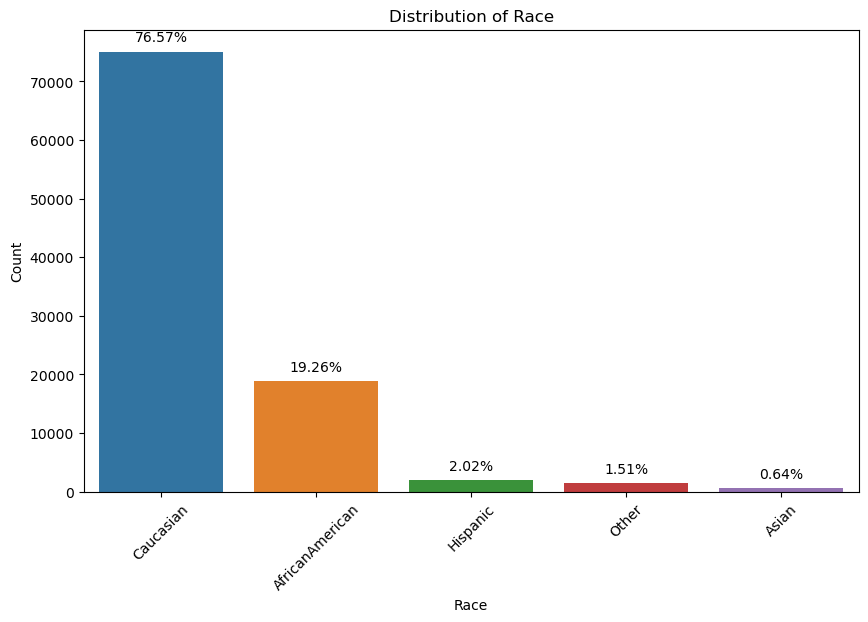

In [296]:
# Calculate the percentage of each race category
race_counts = diab['race'].value_counts()
race_percentages = (race_counts / race_counts.sum()) * 100

# Plot the distribution of race with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diab, x='race', order=race_counts.index)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate percentages
for p, percentage in zip(ax.patches, race_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

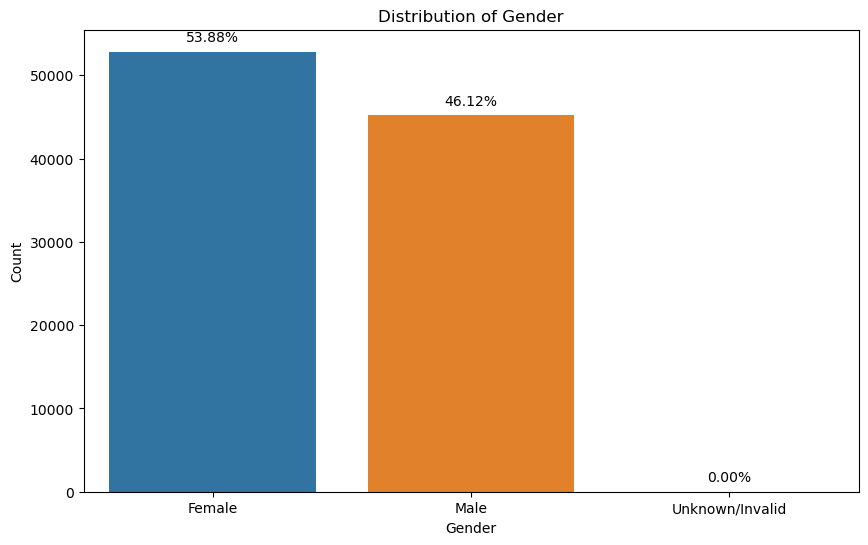

In [297]:
# Calculate the percentage of each gender category
gender_counts = diab['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Plot the distribution of gender with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diab, x='gender', order=gender_counts.index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate percentages
for p, percentage in zip(ax.patches, gender_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

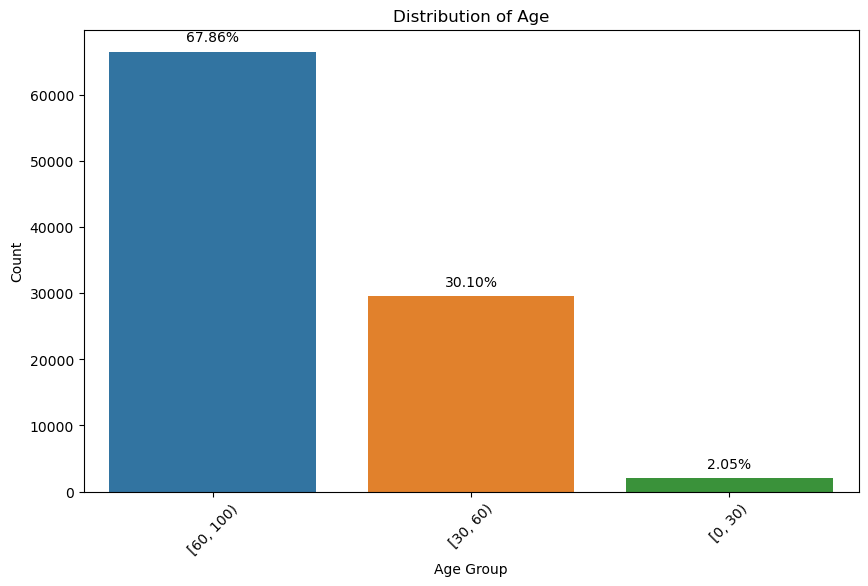

In [298]:
# Calculate the percentage of each age group
age_counts = diab['age'].value_counts()
age_percentages = (age_counts / age_counts.sum()) * 100

# Plot the distribution of age with percentages
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diab, x='age', order=age_counts.index)
plt.title('Distribution of Age')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate percentages
for p, percentage in zip(ax.patches, age_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Summary
The provided visualizations illustrate the demographic breakdown of the dataset across race, gender, and age groups.

**Race:** The majority of the patients are Caucasian, comprising 76.57% of the total, followed by African Americans at 19.26%. Other racial groups, including Hispanic (2.02%), Other (1.51%), and Asian (0.64%), are much less represented.

**Gender:** There is a slightly higher representation of females (53.88%) compared to males (46.12%), with no significant data for the Unknown/Invalid category.

**Age:** The age distribution indicates that the largest age group is between 60 to 100 years, accounting for 67.86% of the population. The 30 to 60 years age group comprises 30.10%, while the 0 to 30 years age group makes up a small fraction at 2.05%.

These distributions suggest a predominantly older and Caucasian patient population, with a slight female majority. This demographic information is crucial for tailoring healthcare interventions and understanding the population's healthcare needs.

## 6.2. Breakdown of Admission Types <a class ='author' id='section-6.2'></a>
Admission types can be described using the `admission_type_id` column. Let's map the IDs to their respective descriptions:

In [299]:
diab['admission_type_id']

1         1
2         1
3         1
4         1
5         2
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 98053, dtype: int64

In [300]:
admission_type_df

,admission_type_id,description
0,1.0,Emergency
1,2.0,Urgent
2,3.0,Elective
3,4.0,Newborn
4,5.0,Not Available
5,6.0,NaN
6,7.0,Trauma Center
7,8.0,Not Mapped


In [301]:
admission_source_df

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [302]:
discharge_disposition_df

,discharge_disposition_id,description
0,1.0,Discharged to home
1,2.0,Discharged/transferred to another short term h...
2,3.0,Discharged/transferred to SNF
3,4.0,Discharged/transferred to ICF
4,5.0,Discharged/transferred to another type of inpa...
5,6.0,Discharged/transferred to home with home healt...
6,7.0,Left AMA
7,8.0,Discharged/transferred to home under care of H...
8,9.0,Admitted as an inpatient to this hospital
9,10.0,Neonate discharged to another hospital for neo...


In [303]:
# Create dictionaries from dataframes
admission_type_desc = dict(zip(admission_type_df['admission_type_id'], admission_type_df['description']))
discharge_disposition_desc = dict(zip(discharge_disposition_df['discharge_disposition_id'], discharge_disposition_df['description']))
admission_source_desc = dict(zip(admission_source_df['admission_source_id'], admission_source_df['description']))

In [304]:
# Map the descriptions
diab['admission_type_desc'] = diab['admission_type_id'].map(admission_type_desc)
diab['discharge_disposition_desc'] = diab['discharge_disposition_id'].map(discharge_disposition_desc)
diab['admission_source_desc'] = diab['admission_source_id'].map(admission_source_desc)

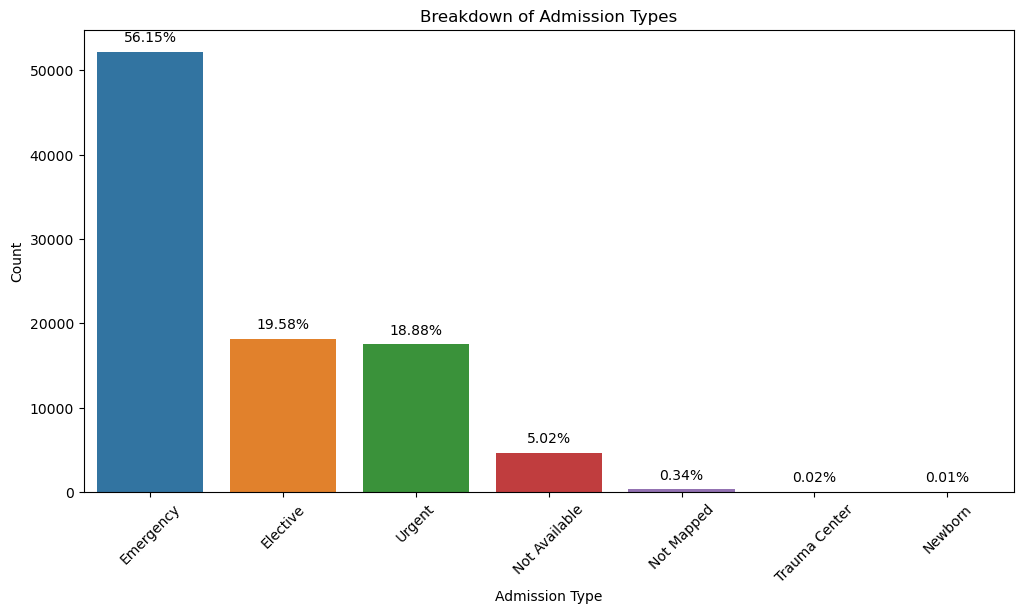

In [305]:
# Calculate the percentage of each admission type
admission_type_counts = diab['admission_type_desc'].value_counts()
admission_type_percentages = (admission_type_counts / admission_type_counts.sum()) * 100

# Plot the distribution of admission types with percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=diab, x='admission_type_desc', order=admission_type_counts.index)
plt.title('Breakdown of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate percentages
for p, percentage in zip(ax.patches, admission_type_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

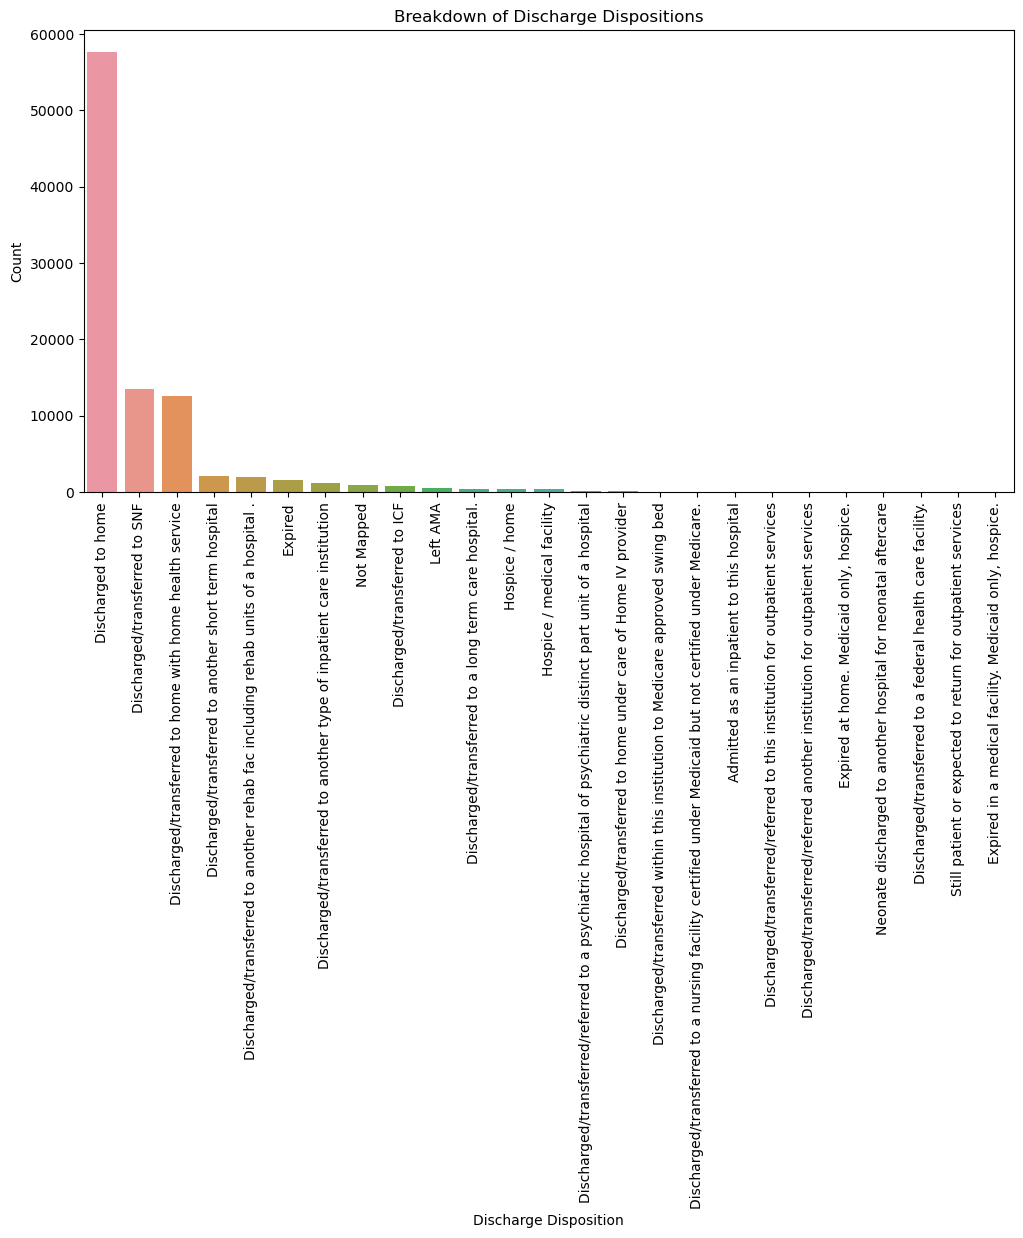

In [306]:
# Distribution of discharge dispositions
plt.figure(figsize=(12, 6))
sns.countplot(data=diab, x='discharge_disposition_desc', order=diab['discharge_disposition_desc'].value_counts().index)
plt.title('Breakdown of Discharge Dispositions')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

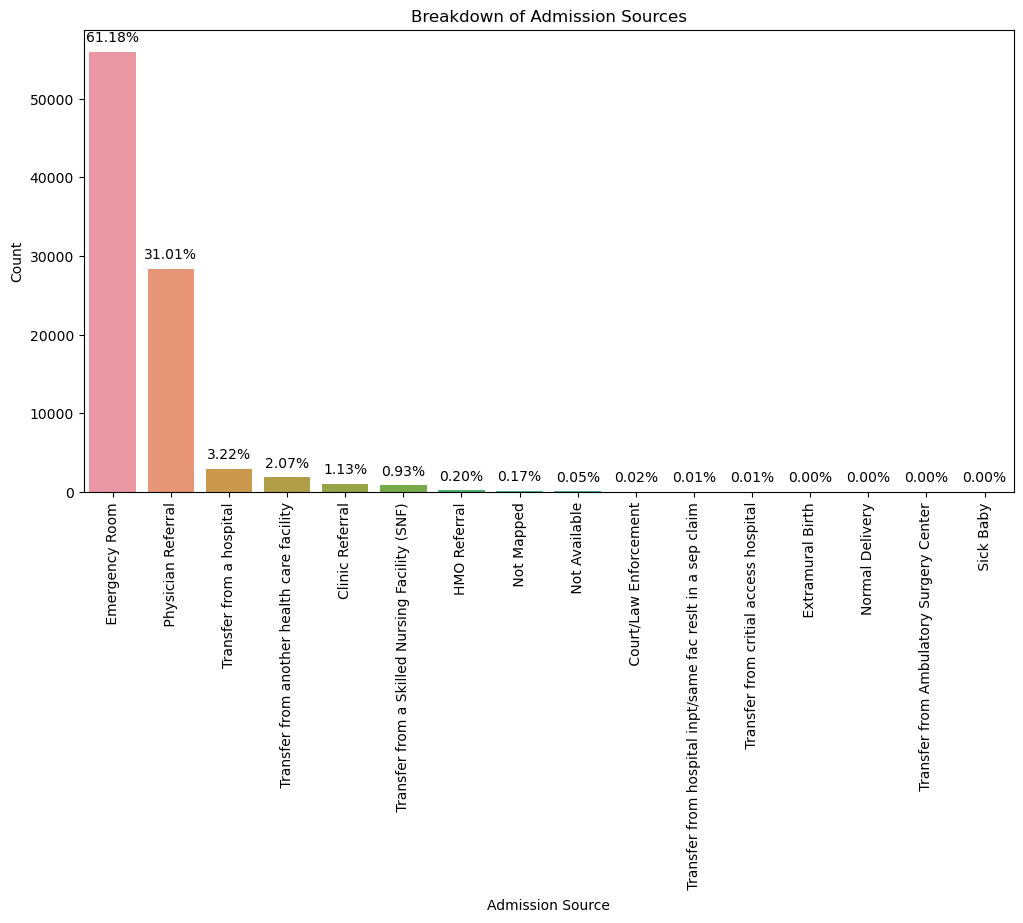

In [307]:
# Calculate the percentage of each admission source
admission_source_counts = diab['admission_source_desc'].value_counts()
admission_source_percentages = (admission_source_counts / admission_source_counts.sum()) * 100

# Plot the distribution of admission sources with percentages
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=diab, x='admission_source_desc', order=admission_source_counts.index)
plt.title('Breakdown of Admission Sources')
plt.xlabel('Admission Source')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate percentages
for p, percentage in zip(ax.patches, admission_source_percentages):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Summary
The visualizations reveal key insights into the distributions of admission types, discharge dispositions, and admission sources among patients. 

Emergency admissions dominate the dataset, comprising 56.15% of all cases, followed by elective (19.58%) and urgent (18.88%) admissions. Discharge dispositions show that the majority of patients (about 60%) are discharged to home, with smaller percentages transferred to other facilities or home health services. Admissions primarily stem from emergency rooms (61.18%) and physician referrals (31.01%), highlighting the critical role of emergency care in patient admissions. These distributions emphasize the importance of focusing on emergency admissions and effective discharge planning to improve patient outcomes and reduce readmission rates.


## 6.3. Identifying Sub-Groups to Explore and Assessing Readmission Risk <a class ='author' id='section-6.3'></a>
Identify a few sub-groups to explore and note why you choose these groups. Identify if any of the selected groups are at higher risk for readmission.

To identify sub-groups and assess their readmission risk, we need to consider factors that might influence hospital readmission rates. Here are a few sub-groups that could be explored:

1. **Race**:
   - **Why**: Different racial groups may have varying access to healthcare resources, cultural differences in seeking healthcare, and predispositions to certain health conditions.
   - **Goal**: Determine if there are disparities in readmission rates among different racial groups.

2. **Age Group**:
   - **Why**: Age is a significant factor in healthcare, with older patients generally having more complex health issues and potentially higher readmission rates.
   - **Goal**: Identify if older age groups have higher readmission rates compared to younger age groups.

3. **Gender**:
   - **Why**: Gender can influence health outcomes due to biological differences, health-seeking behavior, and social factors.
   - **Goal**: Assess if there are differences in readmission rates between males and females.

4. **Medical Specialty**:
   - **Why**: The type of medical specialty involved in a patient’s care might affect the quality of care and follow-up practices, influencing readmission rates.
   - **Goal**: Determine if certain specialties have higher readmission rates, indicating potential areas for improvement in care.

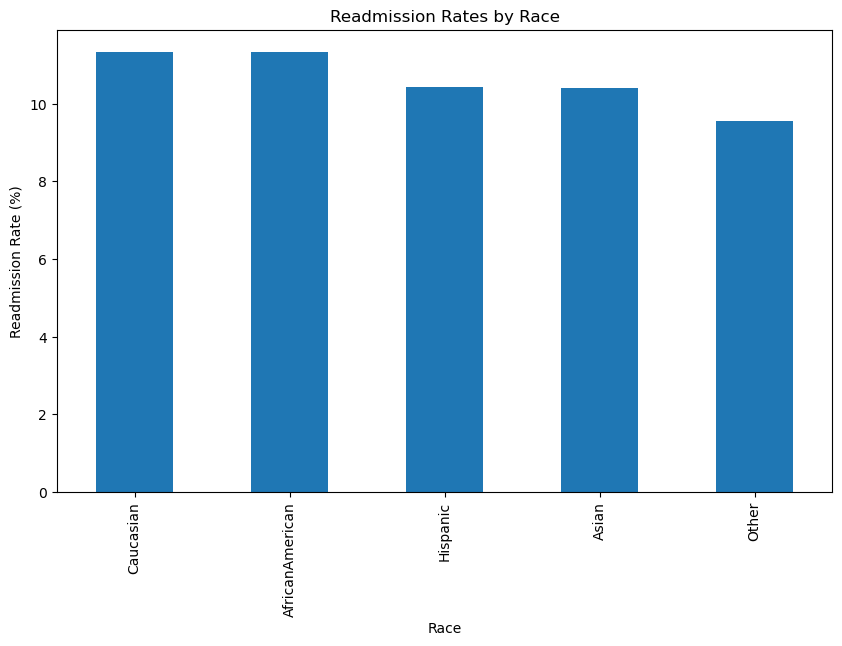

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your main dataframe (diab) with relevant columns
# Assuming diab has columns: race, age, gender, medical_specialty, admission_type_desc, readmitted

# Readmission Rates by Race
race_readmission = diab.groupby('race')['readmitted'].mean() * 100
race_readmission = race_readmission.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
race_readmission.plot(kind='bar')
plt.title('Readmission Rates by Race')
plt.xlabel('Race')
plt.ylabel('Readmission Rate (%)')
plt.show()

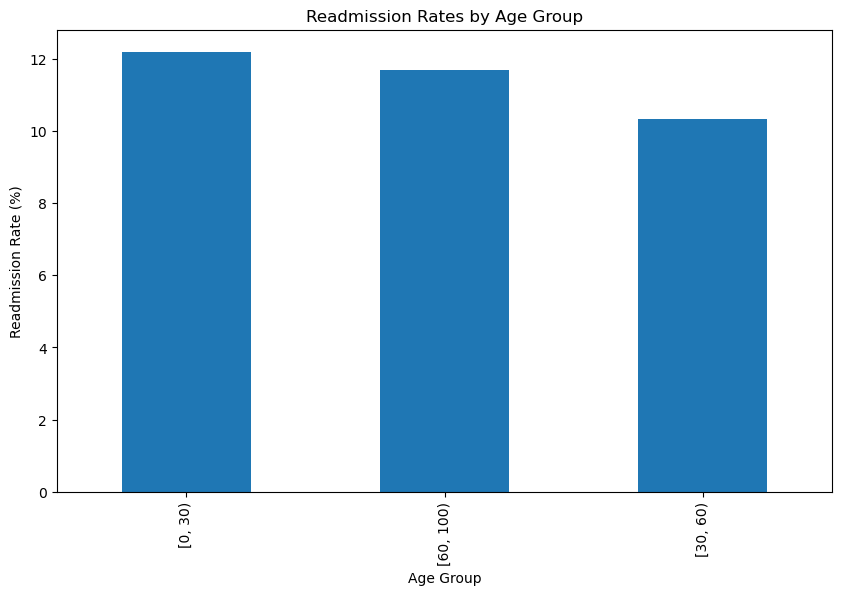

In [309]:
# Readmission Rates by Age Group
age_readmission = diab.groupby('age')['readmitted'].mean() * 100
age_readmission = age_readmission.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
age_readmission.plot(kind='bar')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.show()

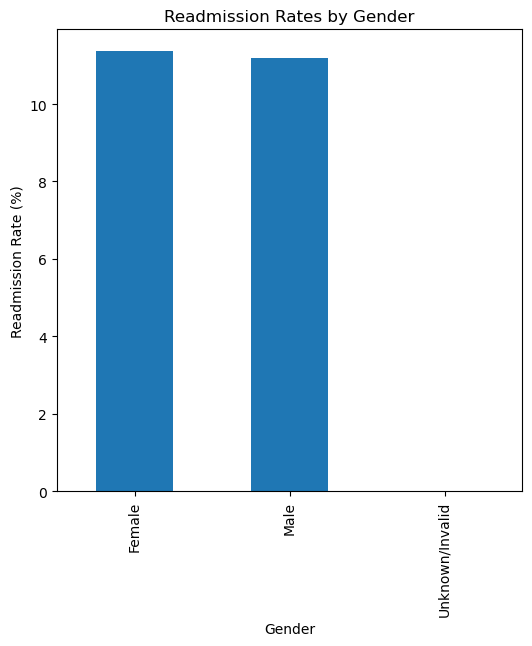

In [331]:
# Readmission Rates by Gender
gender_readmission = diab.groupby('gender')['readmitted'].mean() * 100
gender_readmission = gender_readmission.sort_values(ascending=False)

plt.figure(figsize=(6, 6))
gender_readmission.plot(kind='bar')
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate (%)')
plt.show()

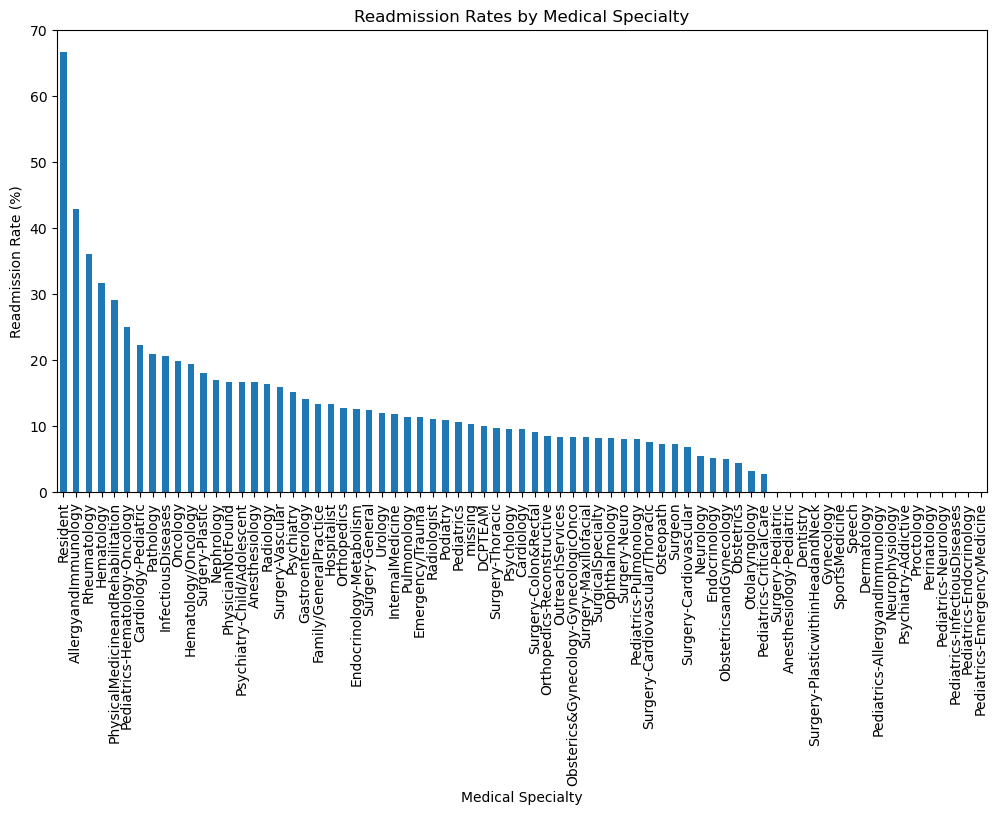

In [311]:
# Readmission Rates by Medical Specialty
specialty_readmission = diab.groupby('medical_specialty')['readmitted'].mean() * 100
specialty_readmission = specialty_readmission.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
specialty_readmission.plot(kind='bar')
plt.title('Readmission Rates by Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=90)
plt.show()

### Summary

I was asked to determine if there are any sub-groups that are at higher risk for hospital readmission. Based on the visualized data in the provided subplots, we can draw the following conclusions:

- **Race**: While there are slight variations, race does not appear to be a major factor in readmission rates in this dataset.
- **Age Group**: Both younger (0-30 years) and older (60-100 years) patients are more likely to be readmitted compared to middle-aged patients.
- **Gender**: There is no significant difference in readmission rates between males and females.
- **Medical Specialty**: Certain specialties, have higher readmission rates, suggesting a need for targeted improvements in those areas.

Based on the analysis of readmission rates by medical specialty, it is evident that certain specialties exhibit significantly higher readmission rates compared to others. To address this, perhaps medical specialties with higher readmission rates should be targeted for interventions aimed at reducing readmissions. This includes implementing robust post-discharge care plans, ensuring timely follow-ups, and providing adequate patient education and support.

It is also clear that certain age groups are at higher risk for hospital readmission compared to others. Age-specific discharge planning can help address the unique needs of different age groups. For older patients, ensuring a comprehensive care plan that includes home health services, regular follow-ups, and medication management is crucial.

## 6.4. Statistical Analysis of the Results <a class ='author' id='section-6.4'></a>
Below I Perform some hypothesis testing for the visual results obtained above. In each case:
- If the p-value is less than the significance level (we set on 0.05 here), we reject the null hypothesis and conclude that there is a significant association between the variables.
- If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant association between the variables.

#### Hypothesis Testing for Race and Readmission Rates

**Null Hypothesis (H0):** There is no significant association between race and readmission rates.

**Alternative Hypothesis (H1):** There is a significant association between race and readmission rates.

In [312]:
from scipy.stats import chi2_contingency

# Create a contingency table
race_readmission_ct = pd.crosstab(diab['race'], diab['readmitted'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(race_readmission_ct)

print("Chi-squared test for Race and Readmission Rates")
print(f"Chi2: {chi2}, p-value: {p}")

Chi-squared test for Race and Readmission Rates
Chi2: 6.543099335234238, p-value: 0.1620949529072177


Baswed on the p-value, we can't make any conclusion about whether or not there is a significance association between race and readmission rates.

#### Hypothesis Testing for Age Group and Readmission Rates

**Null Hypothesis (H0):** There is no significant association between age group and readmission rates.

**Alternative Hypothesis (H1):** There is a significant association between age group and readmission rates.

In [313]:
# Create a contingency table
age_readmission_ct = pd.crosstab(diab['age'], diab['readmitted'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(age_readmission_ct)

print("\nChi-squared test for Age Group and Readmission Rates")
print(f"Chi2: {chi2}, p-value: {p}")



Chi-squared test for Age Group and Readmission Rates
Chi2: 39.67279961271481, p-value: 2.4275099756027396e-09


Baswed on the p-value, we can conclude that there is a significance association between age group and readmission rates, so the slight differences captured in the visual above is statsitically well-founded.

#### Hypothesis Testing for Gender and Readmission Rates
**Null Hypothesis (H0):** There is no significant association between gender and readmission rates.

**Alternative Hypothesis (H1):** There is a significant association between gender and readmission rates.

In [314]:
# Create a contingency table
gender_readmission_ct = pd.crosstab(diab['gender'], diab['readmitted'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(gender_readmission_ct)

print("\nChi-squared test for Gender and Readmission Rates")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-squared test for Gender and Readmission Rates
Chi2: 0.761884121258165, p-value: 0.6832174736637753


Baswed on the p-value, we can't make any conclusion about whether or not there is a significance association between gender and readmission rates.

####  Hypothesis Testing for Medical Specialty and Readmission Rates
**Null Hypothesis (H0):** There is no significant association between medical specialty and readmission rates.

**Alternative Hypothesis (H1):** There is a significant association between medical specialty and readmission rates.

In [315]:
# Create a contingency table
specialty_readmission_ct = pd.crosstab(diab['medical_specialty'], diab['readmitted'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(specialty_readmission_ct)

print("\nChi-squared test for Medical Specialty and Readmission Rates")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-squared test for Medical Specialty and Readmission Rates
Chi2: 608.3476184971596, p-value: 7.029186223305348e-86


Baswed on the p-value, we can conclude that there is a significance association between medical specialty and readmission rates, so the slight differences captured in the visual above is statsitically well-founded.

## 6.5. More EDA <a class ='author' id='section-6.5'></a>
We now explore some correlations between some of the variables in our data.

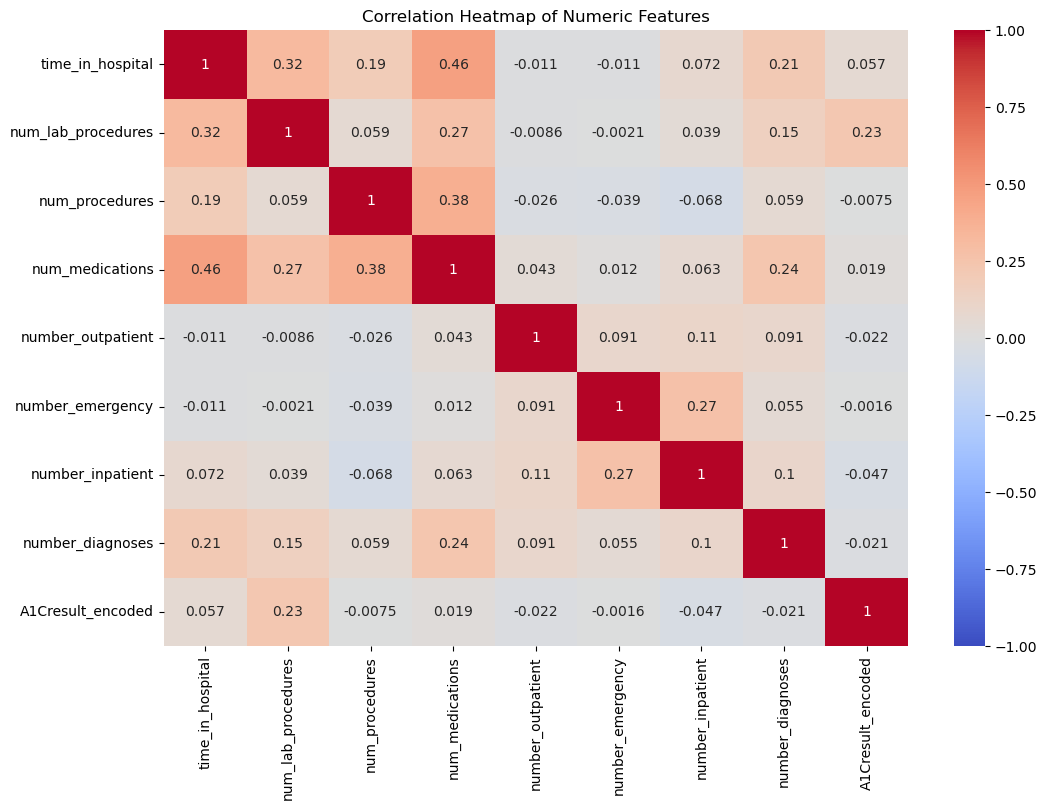

In [316]:
# Encoding A1Cresult for correlation analysis
a1c_mapping = {'>8': 2, 'Norm': 1, 'None': 0}
diab['A1Cresult_encoded'] = diab['A1Cresult'].map(a1c_mapping)

# Selecting numeric features for correlation analysis
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'A1Cresult_encoded']

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(diab[numeric_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


The heatmap illustrates the correlation between various numeric features within the dataset, including the encoded HbA1c results (`A1Cresult_encoded`). The primary observation is that the correlation coefficients between most features are relatively low, indicating weak linear relationships among them. However, some moderate correlations are notable. For instance, `time_in_hospital` has a moderate positive correlation with `num_lab_procedures` (0.32) and `num_medications` (0.46), suggesting that longer hospital stays are associated with more lab procedures and medications administered.

Regarding the `A1Cresult_encoded` variable, its correlations with other features are generally low, with the highest being with `num_lab_procedures` (0.23). This indicates a slight tendency for patients with higher HbA1c values to undergo more lab procedures. Notably, there is a minimal negative correlation between `A1Cresult_encoded` and `number_inpatient` (-0.047), hinting at a very weak inverse relationship. 

### Summary
- `time_in_hospital` correlates moderately with `num_lab_procedures` and `num_medications`, implying longer stays involve more procedures and medications.
- `A1Cresult_encoded` has the highest correlation with `num_lab_procedures` (0.23), suggesting more lab tests for patients with higher HbA1c.
- Correlations with `A1Cresult_encoded` and other features are generally weak, indicating that HbA1c results are not strongly related to most other numeric features in the dataset.

These insights can guide further analysis and model development, highlighting areas where specific interventions might improve patient outcomes, particularly in managing and monitoring HbA1c levels.

## 6.6. Summary of Demographic and Sub-Group Analysis <a class ='author' id='section-6.8'></a>

The visualizations illustrate the demographic breakdown of the dataset across race, gender, and age groups. The majority of the patients are Caucasian, comprising 76.57% of the total, followed by African Americans at 19.26%. There is a slightly higher representation of females (53.88%) compared to males (46.12%). The age distribution indicates that the largest age group is between 60 to 100 years, accounting for 67.86% of the population. These distributions suggest a predominantly older and Caucasian patient population, with a slight female majority, which is crucial for tailoring healthcare interventions and understanding the population's healthcare needs.

The visualizations reveal key insights into the distributions of admission types, discharge dispositions, and admission sources among patients. Emergency admissions dominate the dataset, comprising 56.15% of all cases. The majority of patients (about 60%) are discharged to home, with smaller percentages transferred to other facilities or home health services. Admissions primarily stem from emergency rooms (61.18%) and physician referrals (31.01%). These distributions emphasize the importance of focusing on emergency admissions and effective discharge planning to improve patient outcomes and reduce readmission rates. Based on the analysis, certain medical specialties and age groups exhibit higher readmission rates, suggesting a need for targeted improvements in those areas, including robust post-discharge care plans and comprehensive age-specific care strategies.


# 7. Machine Learning <a class ='author' id='section-7'></a>
**Tasks**

Create a logistic-regression model, and evaluate its performance. Include appropriate metrics and visual outputs.

## 7.1. One-Hot Encode Categorical Variables <a class ='author' id='section-7.1'></a>
Convert categorical variables into numerical values using one-hot encoding.

Now that we have reduced the number of categories in some of the major variables, let's turn all cetgeorical variables into number ones for analysis

In [317]:
# Let's remove some of the redundant or irrelevant vairables

# First, the variables that we had added for EDA. We alredy have their numeric representations
diab2 = diab.copy()
diab2.drop(['admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc'],axis=1,inplace=True)

In [318]:
diab2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,A1Cresult_encoded
1,149190,55629189,Caucasian,Female,"[0, 30)",1,1,7,3,missing,59,0,18,0,0,0,other,other,other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0
2,64410,86047875,AfricanAmerican,Female,"[0, 30)",1,1,7,2,missing,11,5,13,2,0,1,other,250,other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0.0
3,500364,82442376,Caucasian,Male,"[30, 60)",1,1,7,2,missing,44,1,16,0,0,0,other,other,other,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0
4,16680,42519267,Caucasian,Male,"[30, 60)",1,1,7,1,missing,51,0,8,0,0,0,other,other,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0.0
5,35754,82637451,Caucasian,Male,"[30, 60)",2,1,2,3,missing,31,6,16,0,0,0,414,other,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,0.0


In [319]:
# Now we drop the the unique ids because they won't be useful for the model predictions
diab2.drop(['encounter_id', 'patient_nbr'],axis=1,inplace=True)

In [320]:
diab2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,A1Cresult_encoded
1,Caucasian,Female,"[0, 30)",1,1,7,3,missing,59,0,18,0,0,0,other,other,other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0
2,AfricanAmerican,Female,"[0, 30)",1,1,7,2,missing,11,5,13,2,0,1,other,250,other,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0.0
3,Caucasian,Male,"[30, 60)",1,1,7,2,missing,44,1,16,0,0,0,other,other,other,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,0.0
4,Caucasian,Male,"[30, 60)",1,1,7,1,missing,51,0,8,0,0,0,other,other,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,0.0
5,Caucasian,Male,"[30, 60)",2,1,2,3,missing,31,6,16,0,0,0,414,other,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,0.0


Now let's turn our vategorical variables into numerical ones for the purpose of creating or Logistc Regression model

In [321]:
# Select columns with non-numeric values (object and category types)
non_numeric_cols = diab2.select_dtypes(include=['object', 'category']).columns.tolist()

print(non_numeric_cols)

['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [322]:
# Generate the one-hot encoded DataFrame
dummies = pd.get_dummies(diab2[non_numeric_cols], drop_first=True)

# Rename the columns to include the original column name and the value name with '++' as separator to make it easier for tracking
dummies.columns = [f"{col.split('_')[0]}++{col.split('_')[1]}" for col in dummies.columns]

# Concatenate the original DataFrame (excluding the columns that were one-hot encoded) with the dummies DataFrame
diab2 = pd.concat([diab2.drop(columns=non_numeric_cols), dummies], axis=1)

In [323]:
diab2.reset_index(drop=True,inplace=True)

In [324]:
diab2.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,A1Cresult_encoded,race++Asian,race++Caucasian,race++Hispanic,race++Other,gender++Male,gender++Unknown/Invalid,"age++[30, 60)","age++[60, 100)",medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,medical++specialty,diag++1,diag++1,diag++1,diag++1,diag++2,diag++2,diag++2,diag++2,diag++2,diag++3,diag++3,diag++3,diag++3,diag++3,diag++3,max++glu,max++glu,max++glu,A1Cresult++>8,A1Cresult++None,A1Cresult++Norm,metformin++No,metformin++Steady,metformin++Up,repaglinide++No,repaglinide++Steady,repaglinide++Up,nateglinide++No,nateglinide++Steady,nateglinide++Up,chlorpropamide++No,chlorpropamide++Steady,chlorpropamide++Up,glimepiride++No,glimepiride++Steady,glimepiride++Up,acetohexamide++Steady,glipizide++No,glipizide++Steady,glipizide++Up,glyburide++No,glyburide++Steady,glyburide++Up,tolbutamide++Steady,pioglitazone++No,pioglitazone++Steady,pioglitazone++Up,rosiglitazone++No,rosiglitazone++Steady,rosiglitazone++Up,acarbose++No,acarbose++Steady,acarbose++Up,miglitol++No,miglitol++Steady,miglitol++Up,troglitazone++Steady,tolazamide++Steady,tolazamide++Up,insulin++No,insulin++Steady,insulin++Up,glyburide-metformin++No,glyburide-metformin++Steady,glyburide-metformin++Up,glipizide-metformin++Steady,glimepiride-pioglitazone++Steady,metformin-pioglitazone++Steady,change++No,diabetesMed++Yes
0,1,1,7,3,59,0,18,0,0,0,9,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
1,1,1,7,2,11,5,13,2,0,1,6,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
2,1,1,7,2,44,1,16,0,0,0,7,0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,1,1,7,1,51,0,8,0,0,0,5,0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0

## 7.2. Creating the Model <a class ='author' id='section-7.2'></a>

We use the statsmodels library

In [325]:
import statsmodels.api as sm

In [326]:
X = diab2.drop(['readmitted'],axis=1)
y= diab2['readmitted']

In [327]:
X_withconstant = sm.add_constant(X)

In [ ]:
model = sm.GLM(y,X_withconstant)

In [ ]:
result = model.fit()

In [125]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                98053
Model:                            GLM   Df Residuals:                    97891
Model Family:                Gaussian   Df Model:                          161
Link Function:               Identity   Scale:                        0.096552
Method:                          IRLS   Log-Likelihood:                -24442.
Date:                Wed, 19 Jun 2024   Deviance:                       9451.6
Time:                        14:01:14   Pearson chi2:                 9.45e+03
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03788
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5140      0.463      1.110      0.267      -0.393       1.421
admission_type_id                   -0.0027      0.001     -3.414      0.001      -0.004      -0.001
discharge_disposition_id             0.0024      0.000     12.543      0.000       0.002       0.003
admission_source_id                 -0.0006      0.000     -2.098      0.036      -0.001   -4.08e-05
time_in_hospital                     0.0002      0.000      0.437      0.662      -0.001       0.001
num_lab_procedures                 4.92e-05    5.9e-05      0.834      0.404   -6.64e-05       0.000
num_procedures                      -0.0012      0.001     -1.657      0.097      -0.003       0.000
num_medications                      0.0006      0.000      3.764      0.000       0.000       0.001
number_outpatient                   -0.0002      0.001     -0.268      0.789      -0.002       0.001
number_emergency                     0.0073      0.001      6.572      0.000       0.005       0.009
number_inpatient                     0.0354      0.001     42.129      0.000       0.034       0.037
number_diagnoses                     0.0019      0.001      2.937      0.003       0.001       0.003
race++Asian                          0.0063      0.013      0.493      0.622      -0.019       0.031
race++Caucasian                      0.0039      0.003      1.486      0.137      -0.001       0.009
race++Hispanic                       0.0019      0.007      0.262      0.793      -0.013       0.016
race++Other                         -0.0061      0.008     -0.724      0.469      -0.023       0.010
gender++Male                         0.0011      0.002      0.549      0.583      -0.003       0.005
gender++Unknown/Invalid             -0.0527      0.311     -0.169      0.865      -0.662       0.557
age++[30, 60)                       -0.0089      0.008     -1.158      0.247      -0.024       0.006
age++[60, 100)                       0.0021      0.008      0.274      0.784      -0.013       0.017
medical++specialty                  -0.2123      0.148     -1.435      0.151      -0.502       0.078
medical++specialty                  -0.3942      0.148     -2.662      0.008      -0.684      -0.104
medical++specialty                  -0.3016      0.118     -2.564      0.010      -0.532      -0.071
medical++specialty                  -0.2009      0.157     -1.281      0.200      -0.508       0.107
medical++specialty                  -0.3145      0.153     -2.052      0.040      -0.615      -0.014
medical++specialty                  -0.3936      0.195     -2.020      0.043      -0.776      -0.012
medical++specialty                  -0.3611      0.332     -1.086      0.277      -1.012       0.290
medical++specialty                  -0.3013      0.11

In [126]:
# Get predicted probabilities
pred_probs = result.predict(X_withconstant)

# Convert probabilities to binary outcomes using 0.5 as the threshold
predictions = [1 if prob > 0.5 else 0 for prob in pred_probs]
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### 7.2.1. Asessing Model Perfromance

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate classification metrics
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8872242562695685
Precision: 0.528169014084507
Recall: 0.0067775167178745705
F1 Score: 0.013383297644539615
Confusion Matrix:
[[86920    67]
 [10991    75]]



The metrics indicate that your logistic regression model has high accuracy but very low recall and F1 score. This suggests that the model is biased towards the majority class and is not performing well on the minority class (readmitted patients).

Here's a breakdown of the results:

- **Accuracy (0.887):** This high value indicates that the model is making a large number of correct predictions, but given the class imbalance, this is misleading.
- **Precision (0.528):** This means that when the model predicts readmission, it's correct about 52.8% of the time. However, the low recall indicates it rarely makes such predictions.
- **Recall (0.0068):** This very low value indicates that the model is failing to identify most of the readmitted cases.
- **F1 Score (0.013):** The F1 score, being the harmonic mean of precision and recall, is very low, indicating poor performance in identifying the positive class.

This is happening likely due the imbalance of the data dsitribution in our target variable, as is shown below:

In [329]:
y.value_counts()

0    86987
1    11066
Name: readmitted, dtype: int64

The choice between higher recall, higher accuracy, or higher precision depends on the specific goals and context of the model. Let's consider the context of your problem: predicting hospital readmissions. Given the importance of not missing patients at risk of readmission (to provide timely interventions), recall might be more important in this context.

### 7.2.2. Adjusting the Model Performancce
#### Class Weights Adjustment
We can adjust the class weights in the logistic regression model to give more importance to the minority class.

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model with class weights and increased iterations
clf = LogisticRegression(class_weight='balanced', max_iter=100, solver='saga', random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions on the test set
predicted_classes = clf.predict(X_test_scaled)

# Calculate classification metrics
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6547457166168071
Precision: 0.16706858300376193
Recall: 0.5324316015985244
F1 Score: 0.2543318649045521
Confusion Matrix:
[[17528  8635]
 [ 1521  1732]]


C:\Users\OWNER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


As we can see, recall has siginificantly increased.

#### Adjusting Threshold
Another method to improve model prediction is by adjusting the decision threshold. This way we can improve recall at the expense of precision and accuracy. This approach is useful when we want to capture more positive cases (increase recall), which is often critical in imbalanced datasets.

In [137]:
# Adjust the threshold
threshold = 0.3
predicted_classes = [1 if prob > threshold else 0 for prob in pred_probs]

# Calculate classification metrics with new threshold
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.15940304596138155
Precision: 0.11648572145186141
Recall: 0.9792168674698796
F1 Score: 0.2082039130295559
Confusion Matrix:
[[ 1438 24658]
 [   69  3251]]


### 7.2.3. Visualizing Model Performance
Now that we adjusted the threshold, let's visualize the confusion matrix of the improved model.

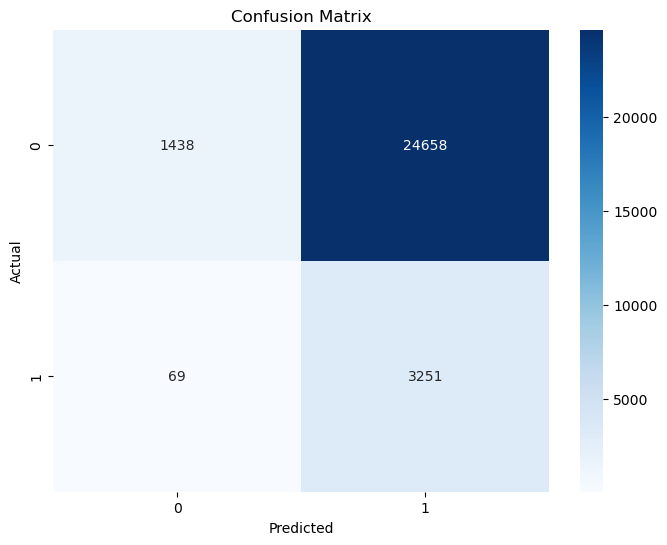

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()